In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

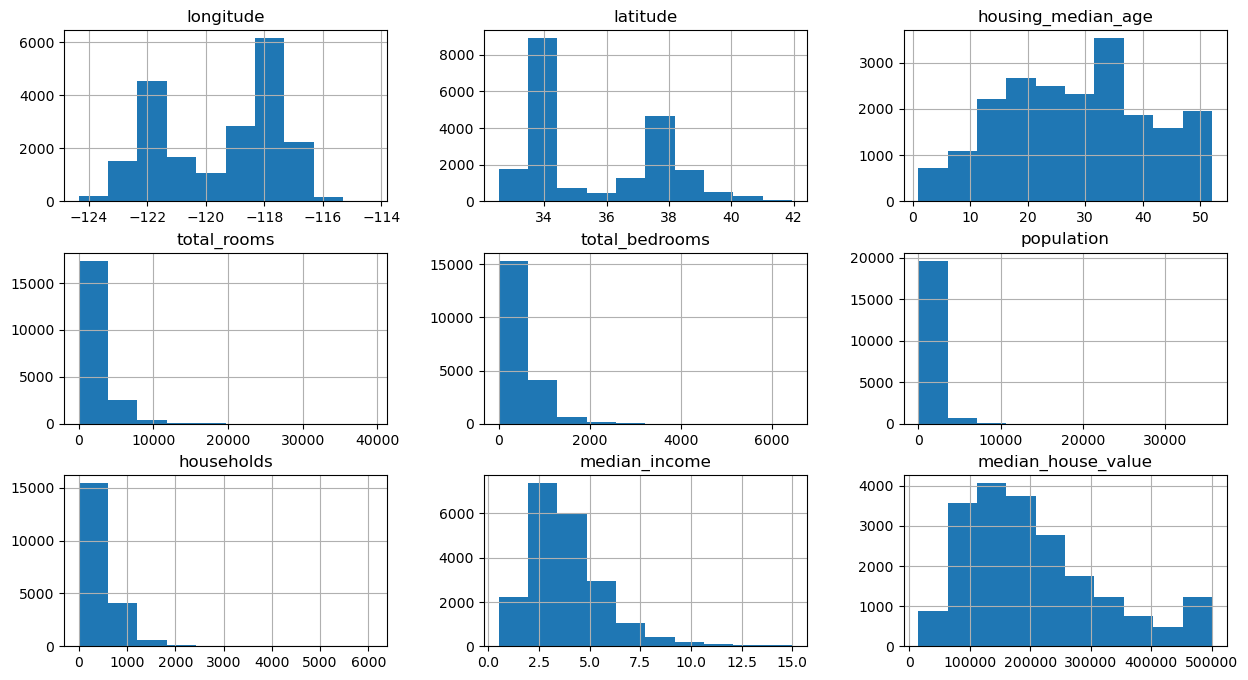

In [11]:
data.hist(figsize = (15,8))

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17796\539834233.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

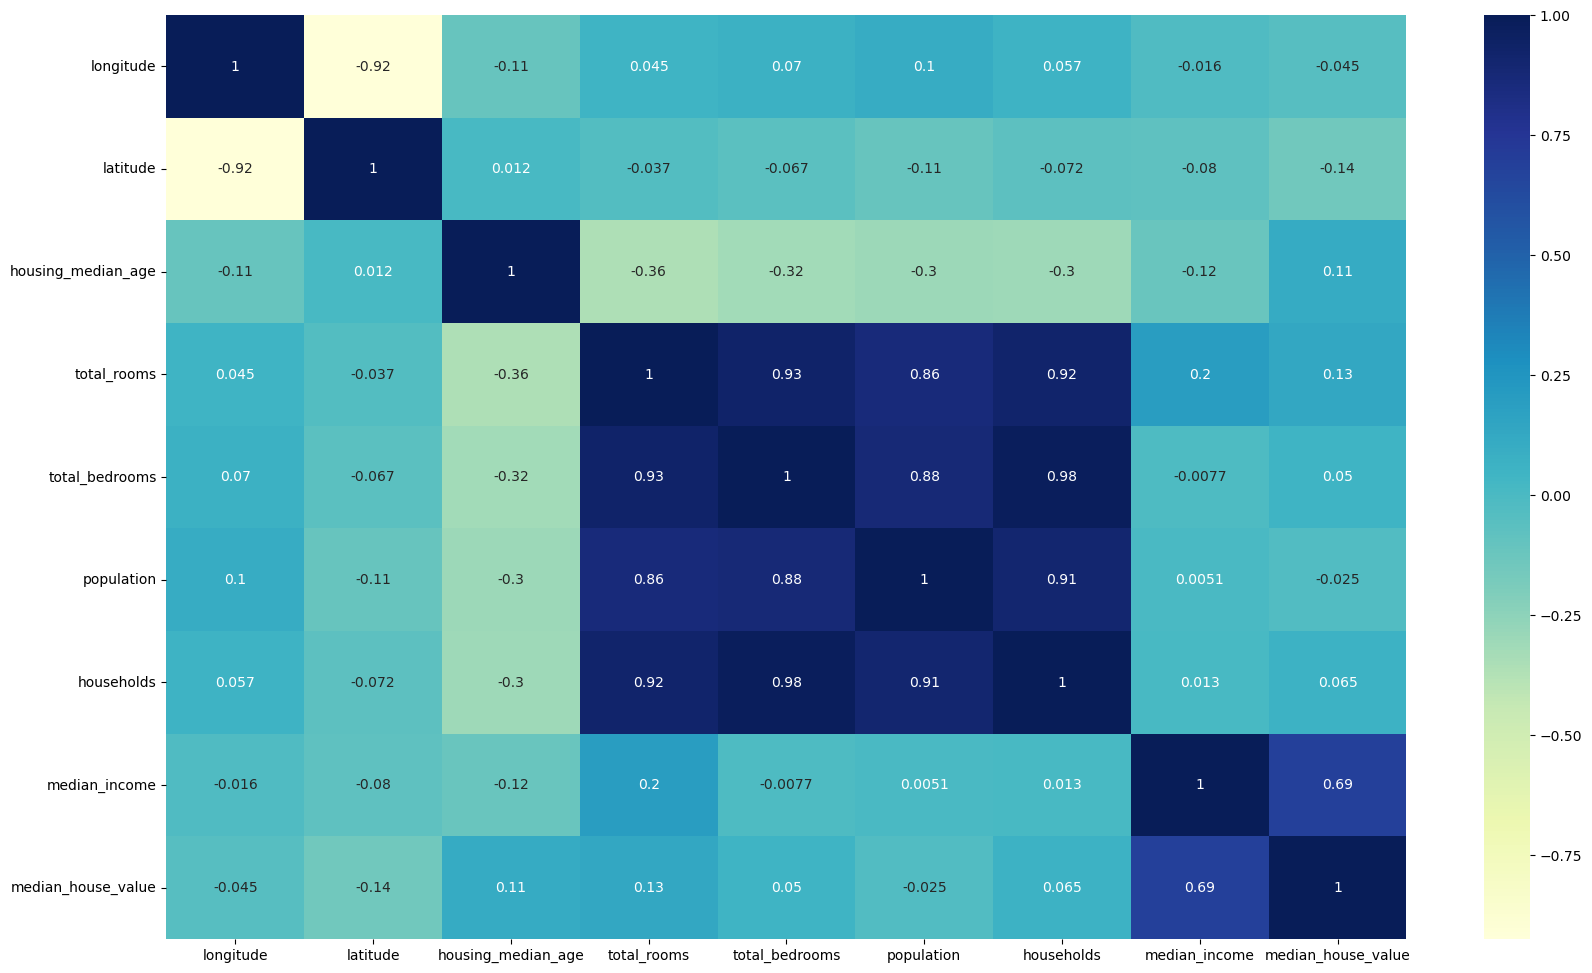

In [14]:
plt.figure(figsize = (20,12))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

In [15]:
data['total_rooms'] = np.log((data['total_rooms']) + 1)
data['total_bedrooms'] = np.log((data['total_bedrooms']) + 1)
data['population'] = np.log((data['population']) + 1)
data['households'] = np.log((data['households']) + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

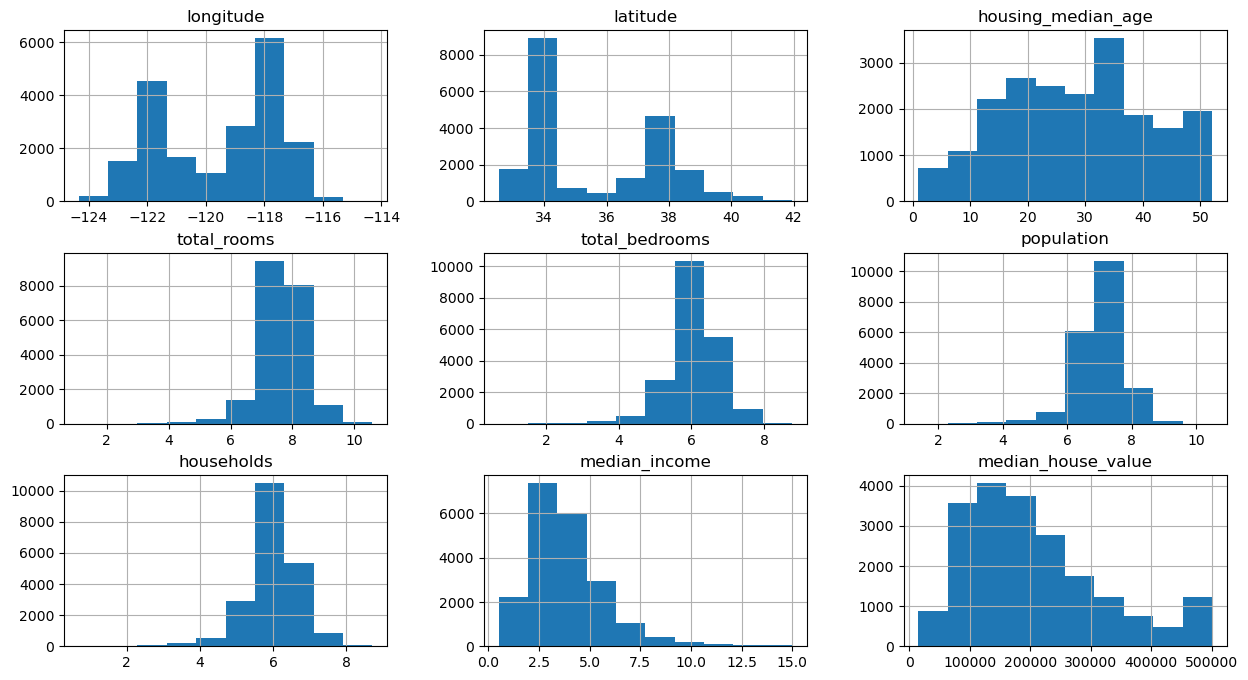

In [19]:
data.hist(figsize = (15,8))

In [20]:
'''to check the amount of data points for ocean proximity'''
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [35]:
data1 = data.join(pd.get_dummies(data.ocean_proximity))

In [36]:
data1.drop(['ocean_proximity'], axis = 1, inplace = True)

In [37]:
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


<Axes: >

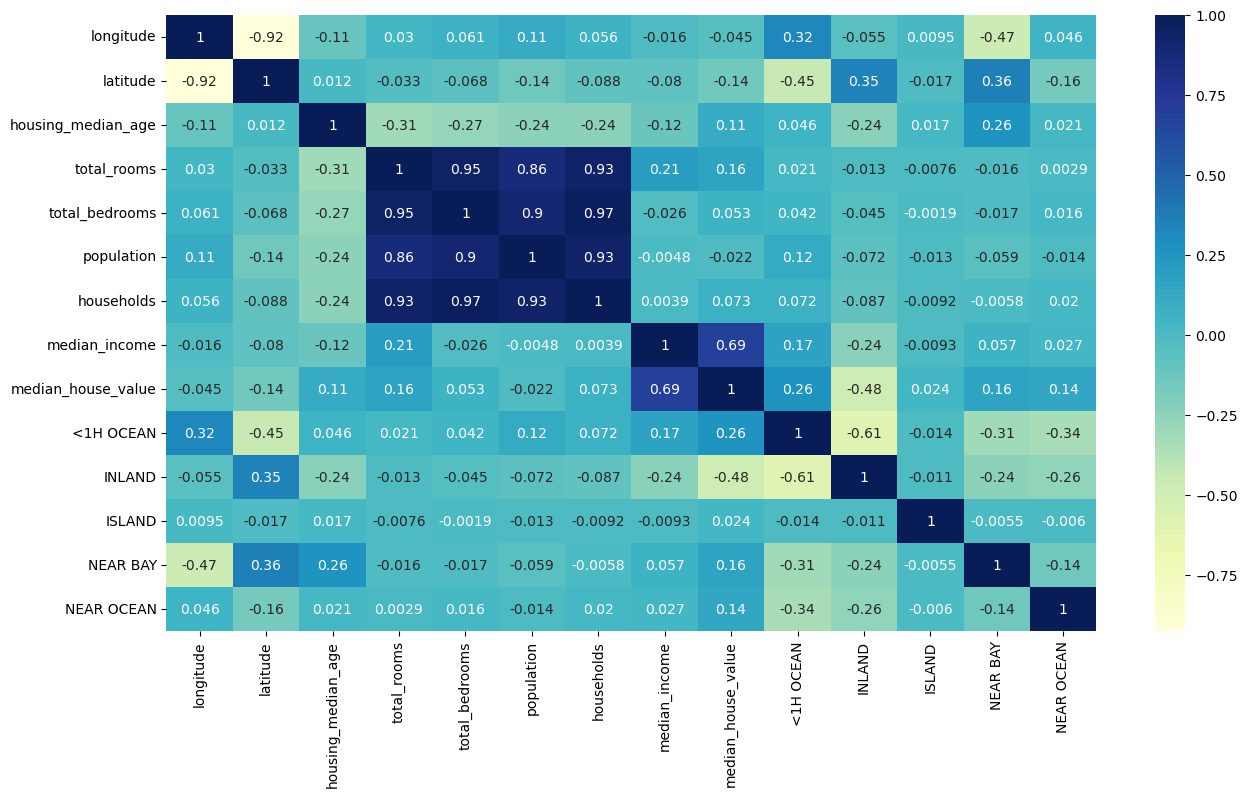

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(data1.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

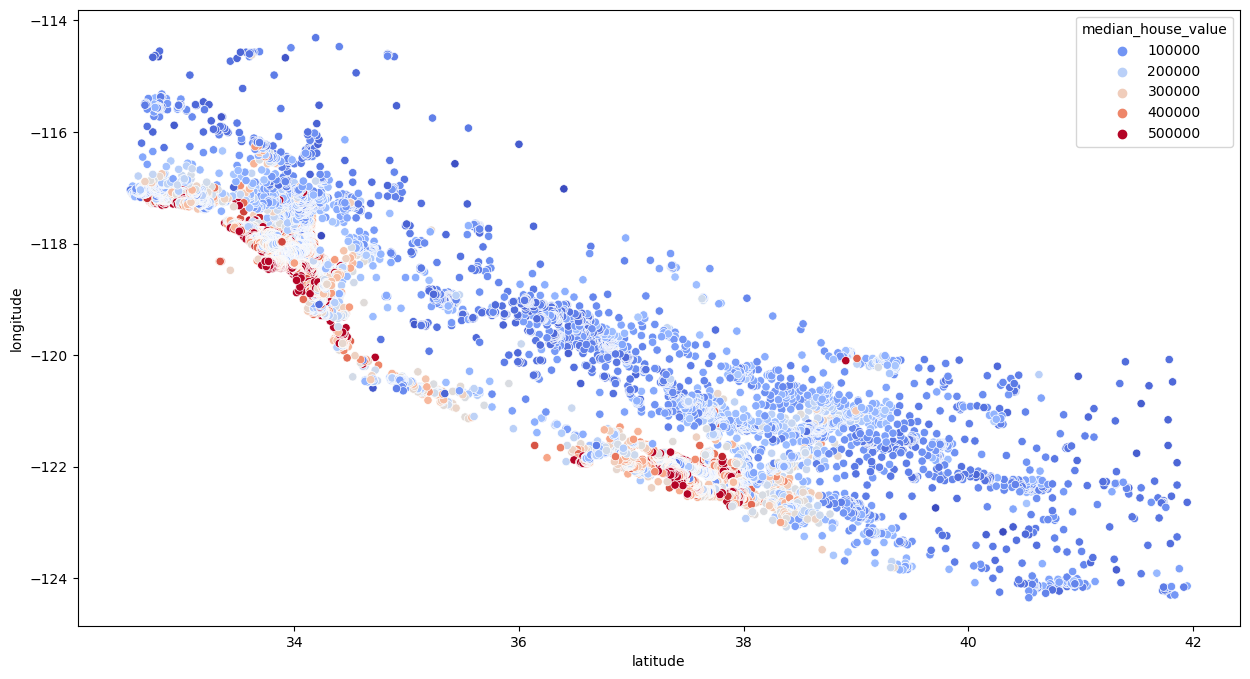

In [41]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "latitude", y = "longitude", data = data1, hue = "median_house_value", palette = "coolwarm")
'''we can see the prices increses as the houses are close to the ocean'''

In [42]:
'''Feature Engineering'''
data1['bedroom_ratio_room'] = data1['total_bedrooms']/data1['total_rooms']
data1['room_ratio_households'] = data1['total_rooms']/data1['households']

<Axes: >

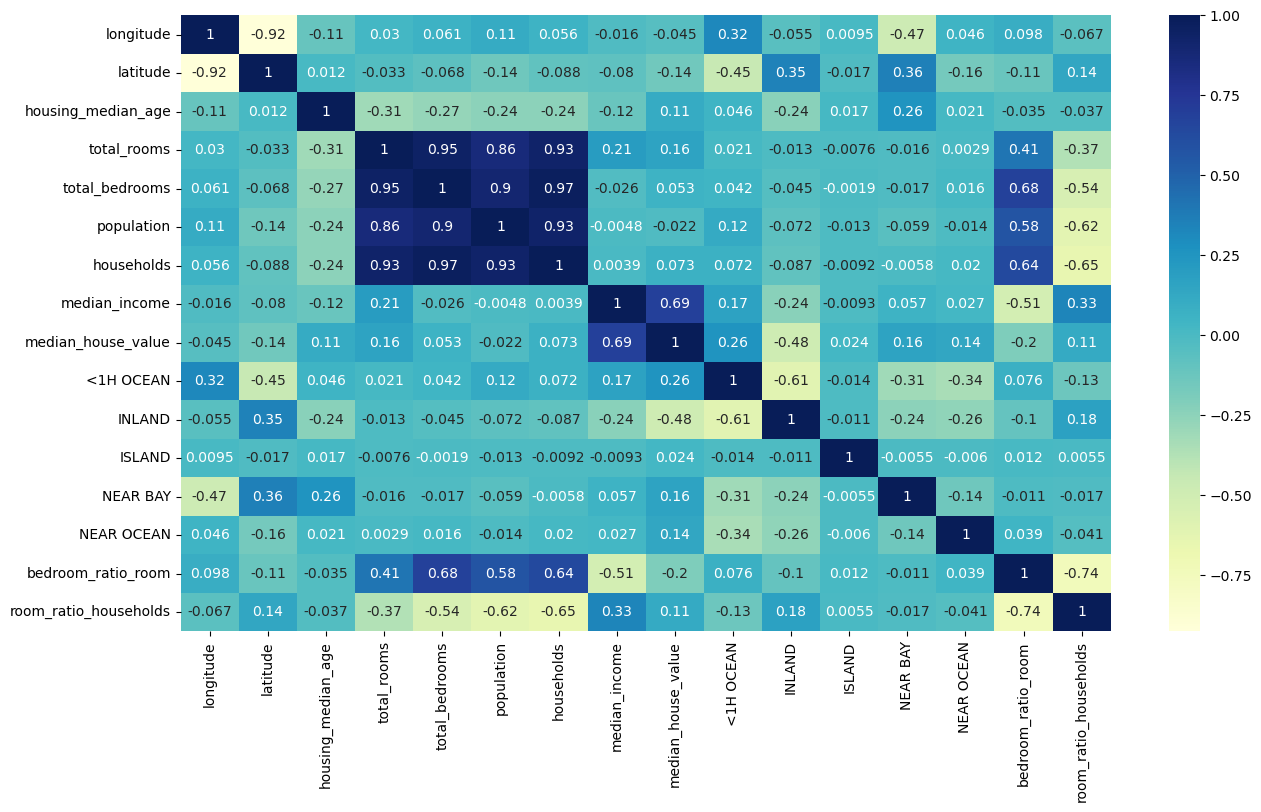

In [43]:
plt.figure(figsize = (15,8))
sns.heatmap(data1.corr(), annot = True, cmap = "YlGnBu")

In [59]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data1.drop(['median_house_value'], axis = 1)
y = data1['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15324, 15), (5109, 15), (15324,), (5109,))

In [64]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [71]:
reg = LR()
reg.fit(X_train_s, y_train)

LinearRegression()

In [92]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = reg.predict(X_test_s)
mean_absolute_percentage_error(y_test, y_pred)

0.2825745793992614

In [93]:
reg.score(X_test_s, y_test)

0.6627076861727845

In [89]:
from sklearn.ensemble import RandomForestRegressor as RFR
'''using a unscaled data gives more precision in forest'''
forest = RFR()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
y_pred = forest.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.17957267042269465

In [97]:
forest.score(X_test, y_test)

0.8155114184273172

In [99]:
from sklearn.model_selection import GridSearchCV

forest = RFR()

param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "min_samples_split": [2, 4]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                          scoring = "neg_mean_squared_error",
                          return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
best_forest = grid_search.best_estimator_
best_forest
'''this is by far the best parameters and it slightly reduced the error'''

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [104]:
y_pred = best_forest.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.17967438338386849

In [105]:
best_forest.score(X_test, y_test)

0.8172526254287171